In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
fp_opt = '/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/children_values_std_opt4.json'
fp_std = '/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/children_values_std.json'

In [3]:
# load json files to list of reaction dicts
with open(fp_std, 'r') as f_std:
    data_std = json.load(f_std)

with open(fp_opt, 'r') as f_opt:
    data_opt = json.load(f_opt)


In [4]:
# convert data to list of list
def convert_to_df(d):
    q_values = [] 
    visits = []
    counts = []
    names = []
    for i in d:
        name = i.get('template')
        meta = i.get('metadata')
        q = meta.get('q_value')
        v = meta.get('visits')
        c = i.get('count')
        q_values.append(q)
        visits.append(v)
        counts.append(c) 
        names.append(name)
    
    data = {
        'Template': names,
        'Q value': q_values,
        'Visits': visits,
        'Count': counts
    }

    
    return pd.DataFrame(data)

In [5]:
df_std = convert_to_df(data_std)
df_opt = convert_to_df(data_opt)

In [6]:
opt_list = ['Unassigned', 'Heteroaryl N-alkylation', 'Halogenation', 'Reductive amination', 'Alcohol to halide', 'RCO2H deprotections', 'Other reductions', 'O-containing heterocycle formation', 'Other functional group interconversion', 'Stille reaction', 'Ketone to alcohol', 'ROH deprotections', 'O-substitution', 'Friedel-Crafts reaction', 'NH deprotections', 'O-sulfonylation', 'S-substitution', 'N-substitution with alkyl-X', 'Nitro to amine reduction', 'Amide to amine reduction', 'N-arylation with Ar-X', 'Other deprotections', 'Alkene to alkane', 'O-acylation to ester', 'NH protections', 'Dehydration', 'N-acylation to amide']

In [7]:
# Determine the difference between optimised reactions
opt_qchange_dict = {}

for i in opt_list:
    std = df_std.loc[df_std['Template'] == i]
    opt = df_opt.loc[df_opt['Template'] == i]

    print('Template: ', i)
    print('STD: ', std.iloc[0]['Q value']/std.iloc[0]['Visits'])
    print('OPT: ', opt.iloc[0]['Q value']/opt.iloc[0]['Visits'])
    print('STD Count: ', std.iloc[0]['Count'])
    print('OPT Count: ', opt.iloc[0]['Count'])
    print(('\n'))

    opt_qchange_dict[i] = [(opt.iloc[0]['Q value']/opt.iloc[0]['Visits'] - std.iloc[0]['Q value']/std.iloc[0]['Visits']), (opt.iloc[0]['Count'] - std.iloc[0]['Count'])]




Template:  Unassigned
STD:  0.8411998481847167
OPT:  0.7056885661452753
STD Count:  5531967
OPT Count:  6639221


Template:  Heteroaryl N-alkylation
STD:  -0.36971696530512466
OPT:  -0.24842227591789748
STD Count:  1049982
OPT Count:  1195584


Template:  Halogenation
STD:  0.32371819027935805
OPT:  -0.032980470894509104
STD Count:  1484787
OPT Count:  2315725


Template:  Reductive amination
STD:  -0.9448599881499337
OPT:  -1.1196326814994446
STD Count:  885855
OPT Count:  994692


Template:  Alcohol to halide
STD:  -0.06331753527189346
OPT:  -1.5688655764173014
STD Count:  770852
OPT Count:  900495


Template:  RCO2H deprotections
STD:  -0.013146614831777849
OPT:  -3.202299279589436
STD Count:  414787
OPT Count:  230637


Template:  Other reductions
STD:  -3.050014784975133
OPT:  -4.9977804333045714
STD Count:  251718
OPT Count:  250257


Template:  O-containing heterocycle formation
STD:  -1.946277191094326
OPT:  -2.5962964945676394
STD Count:  91258
OPT Count:  55830


Template:  O

In [8]:
print(opt_qchange_dict)

for key in opt_o_temps:
    opt_qchange_dict[key] = opt_qchange_dict.pop(key)

print(opt_qchange_dict)

{'Unassigned': [-0.1355112820394414, 1107254], 'Heteroaryl N-alkylation': [0.12129468938722718, 145602], 'Halogenation': [-0.35669866117386717, 830938], 'Reductive amination': [-0.17477269334951095, 108837], 'Alcohol to halide': [-1.5055480411454079, 129643], 'RCO2H deprotections': [-3.1891526647576582, -184150], 'Other reductions': [-1.9477656483294385, -1461], 'O-containing heterocycle formation': [-0.6500193034733135, -35428], 'Other functional group interconversion': [-0.35730803572970354, 613999], 'Stille reaction': [4.84339747876637, 9980], 'Ketone to alcohol': [1.8824798952983972, 13188], 'ROH deprotections': [0.5429177031803427, 88671], 'O-substitution': [-0.04218892263482682, 451284], 'Friedel-Crafts reaction': [-3.2920020143314495, 118256], 'NH deprotections': [0.11724400063156251, 8113], 'O-sulfonylation': [-50.10963077364827, -21803], 'S-substitution': [-1.2806598946660452, 20600], 'N-substitution with alkyl-X': [0.8854586051083643, 244961], 'Nitro to amine reduction': [-0.

NameError: name 'opt_o_temps' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

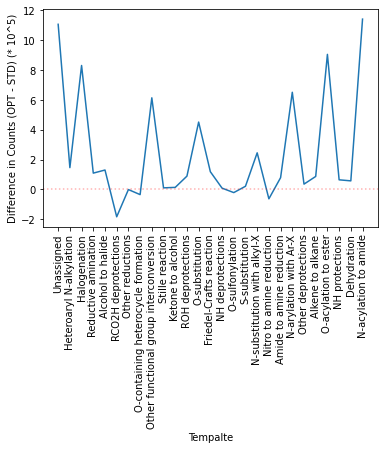

In [12]:
import matplotlib.pyplot as plt

temps = list(opt_qchange_dict.keys())
dc = list(opt_qchange_dict.values())
counts = [i[1]/100000 for i in dc]
diffs = [i[0] for i in dc]

plt.plot(temps, counts)
plt.xticks(rotation=90)
plt.xlabel('Tempalte')
plt.ylabel('Difference in Counts (OPT - STD) (* 10^5)')
plt.axhline(y=0, alpha=0.3, c='red', linestyle='dotted')
#plt.savefig('/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/Images/count_diff.png')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

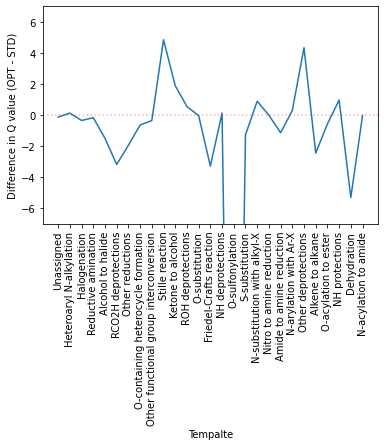

In [17]:
temps = list(opt_qchange_dict.keys())
dc = list(opt_qchange_dict.values())
counts = [i[1]/100000 for i in dc]
diffs = [i[0] for i in dc]

plt.plot(temps, diffs)
plt.xticks(rotation=90)
plt.xlabel('Tempalte')
plt.ylabel('Difference in Q value (OPT - STD)')
plt.axhline(y=0, alpha=0.3, c='red', linestyle='dotted')
plt.ylim(-7,7)
plt.show

In [11]:
o_temps=['Unassigned', 'Heteroaryl N-alkylation', 'Reductive amination', 'RCO2H deprotections', 'Halogenation', 'O-acylation to ester', 'Other functional group interconversion', 'Other reductions', 'Alcohol to halide', 'ROH deprotections', 'O-substitution', 'NH deprotections', 'N-arylation with Ar-X', 'Amide to amine reduction', 'O-sulfonylation', 'Friedel-Crafts reaction', 'N-acylation to amide', 'Alkene to alkane', 'Acid to acid chloride', 'S-substitution', 'N-substitution with alkyl-X', 'NH protections', 'Other deprotections', 'Ketone to alcohol', 'O-containing heterocycle formation', 'Nitro to amine reduction', 'Alcohols to aldehydes']
opt_o_temps = [i for i in o_temps if i in opt_list]